### Exercise 1

We consider a database containing geometrical features of iris plants. The dataset can be loaded with the following commands:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
data_nparray = data.to_numpy()
A = data_nparray[:, :4].T.astype(np.float64) # be careful, there is the transpose so rows as features and columns as samples
labels = data_nparray[:,4] #last column of the data
features = np.array(data.columns[:4])
groups = ("Iris-setosa","Iris-versicolor","Iris-virginica")

In [4]:
features

array([0, 1, 2, 3], dtype=int64)

In [5]:
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# PCA on the Iris Dataset

### 1. How many samples are there in the dataset? How many samples belong to each class?
The dataset contains samples of iris plants, each labeled as one of three classes:
- *Iris-setosa*
- *Iris-versicolor*
- *Iris-virginica*

In [7]:
A.shape

(4, 150)

In [8]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
1,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
2,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
3,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [9]:
print('%d features' % A.shape[0])
print('%d samples' % A.shape[1])

for g in groups:
    print('%d iris plant in category #%s'% (np.sum(labels == g), g))

4 features
150 samples
50 iris plant in category #Iris-setosa
50 iris plant in category #Iris-versicolor
50 iris plant in category #Iris-virginica


### 2. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of:
- The **singular values**: $$\sigma_k$$
- The **cumulate fraction of singular values**: $$\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$$
- The **fraction of the explained variance**: $$\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$$




In [10]:
A_norm = (A - np.mean(A, axis=1)[:,None]) / np.std(A, axis=1)[:,None]
A_norm

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

Text(0.5, 1.0, 'Explained Variance')

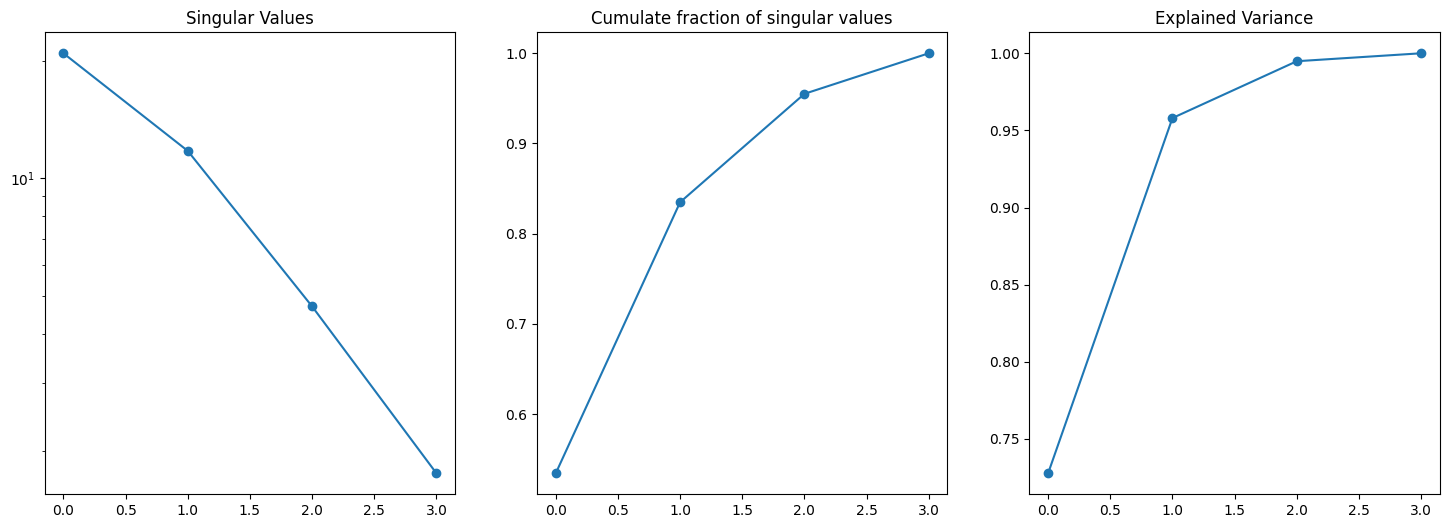

In [11]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

fig, axes = plt.subplots(1, 3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s) / np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained Variance')


### 3. Compute a matrix containing the principal components associated with the dataset.

In [12]:
Phi = U.T @ A_norm

In [13]:
Phi.shape

(4, 150)

see how each feature contributes to PC1

In [14]:
U[:,0]

array([-0.52237162,  0.26335492, -0.58125401, -0.56561105])

In [15]:
U[:,1]

array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])

C:\Users\Crist\AppData\Local\Temp\ipykernel_20940\2103260032.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(features, rotation=90)
C:\Users\Crist\AppData\Local\Temp\ipykernel_20940\2103260032.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(features, rotation=90)


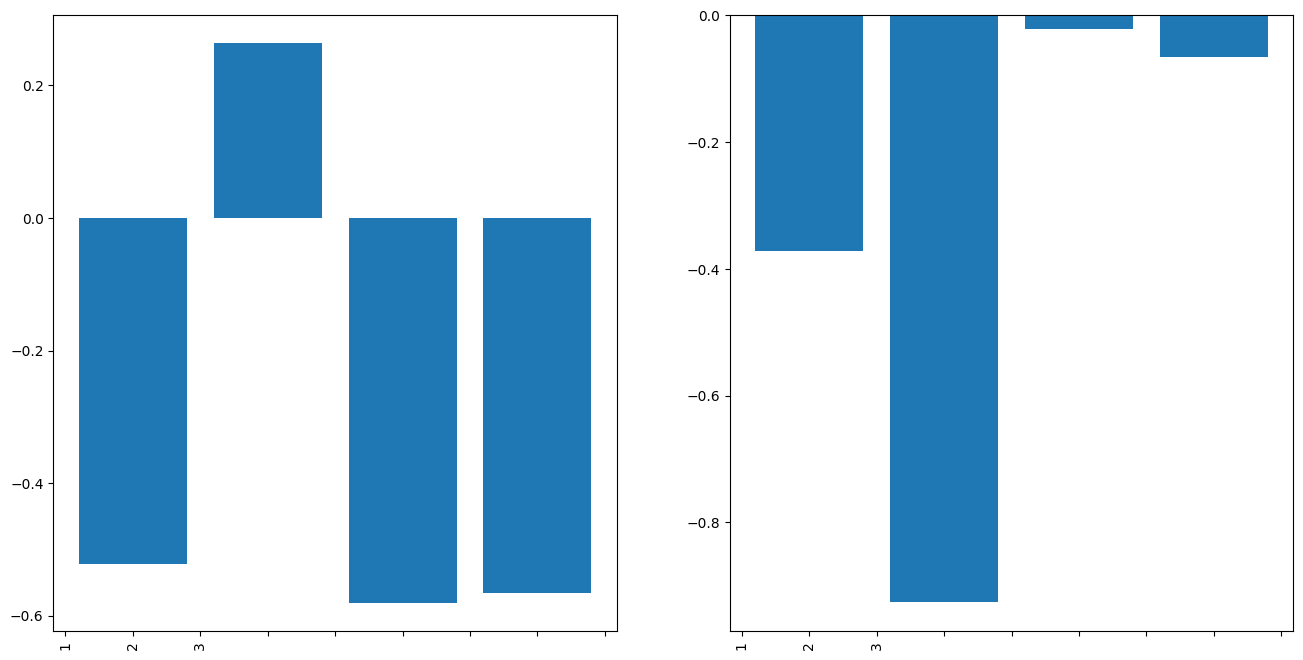

In [16]:
fig, axs = plt.subplots(1,2,figsize = (16,8))
for i in range(2):
  axs[i].bar(features, U[:, i])
  axs[i].set_xticklabels(features, rotation=90)

### 4. Generate a scatterplot of the first two principal components of the dataset, grouped by label.

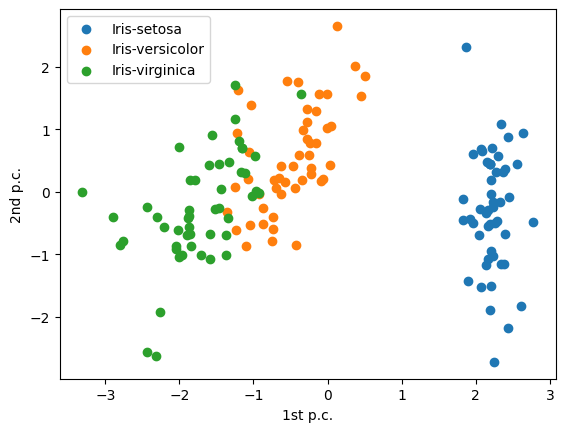

In [17]:
for g in groups:
  plt.scatter(Phi[0, labels == g], Phi[1, labels == g], label = g)
plt.xlabel('1st p.c.')
plt.ylabel('2nd p.c.')
plt.legend()

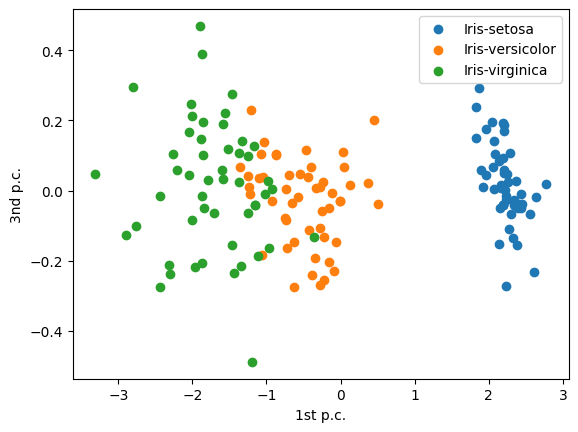

In [18]:
for g in groups:
  plt.scatter(Phi[0, labels == g], Phi[3, labels == g], label = g)
plt.xlabel('1st p.c.')
plt.ylabel('3nd p.c.')
plt.legend()

### 5. Comment on the results of point 4, in light of the results of point 2.

#### **Analysis Based on Point 2 (Explained Variance and Singular Values):**
1. **Singular Values:**
   - The first singular value is significantly larger than the others, indicating that the first principal component captures the majority of the variance in the data.
   - The subsequent singular values decrease rapidly, which means the second and third components add less information.

2. **Explained Variance:**
   - The cumulative explained variance shows that the first two components capture more than 95% of the total variance.
   - This suggests that most of the variability in the dataset can be represented in just two dimensions, making the data suitable for 2D visualization.

---

#### **Scatterplot Analysis from Point 4:**
1. The scatterplot of the first two principal components shows clear separations between the three classes:
   - **Iris-setosa** is well-separated from the other two classes in the first principal component.
   - **Iris-versicolor** and **Iris-virginica** overlap slightly in the second principal component, suggesting some similarities in their features.

2. **Link to Variance:**
   - The separation aligns with the explained variance results:
     - The first component dominates the variability, separating **Iris-setosa** from the other classes.
     - The second component contributes less but helps refine the separation between **Iris-versicolor** and **Iris-virginica**.

---

#### **Key Insights:**
- PCA effectively reduces the dimensionality of the dataset while preserving most of the important information.
- The first two principal components are sufficient to distinguish between the three classes, confirming the patterns observed in the explained variance.
- The slight overlap between **Iris-versicolor** and **Iris-virginica** indicates some shared characteristics, which is consistent with known challenges in separating these two species.

This interpretation highlights how PCA simplifies the complexity of the dataset while retaining its structure.


### **Principal Component Interpretation**

#### **PC1: Separates Iris-setosa**
- **Iris-setosa** has feature values that are significantly different from the other two classes (e.g., petal length, petal width).
- PC1 captures the largest variance in the data, focusing on features that distinguish Iris-setosa from Iris-versicolor and Iris-virginica.

#### **PC2: Distinguishes Iris-versicolor and Iris-virginica**
- **Iris-versicolor** and **Iris-virginica** are more similar to each other than to Iris-setosa.
- PC2 captures the next-largest variance, focusing on subtle differences between these two classes.

#### **Summary**
- **PC1** separates Iris-setosa from the rest because its features dominate the largest variance.
- **PC2** separates Iris-versicolor and Iris-virginica based on smaller, more nuanced differences in their features.
